In [1]:
#About this file:
#Generates fake height CME data to test the velocity functions
#The fake height data is created in a value called 'h' defined in the block below
#The derivative of 'h' is 'velocity'
#The velocity function that we are testing is 'vx'
# 'velocity' and 'vx' should have similar plots

%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import sys
sys.path.insert(0, 'C:/Users/Betsy/Documents/TCD/cmevo/functions')
import cme_graphing

In [2]:
#based off Dec 19,1996 data
Rsun_m = 6.95700e8
delta_time = 50.0 * 60.0 # 15 minutes apart for recordings, times 60 to get seconds
h_0 = 2.76 * Rsun_m #height is 2.76 solar radius, in m
v_0 = 100  *1000 #velocity is 100 m/s

#using the parameters for figure 1, 1996
a_0 = 53*1000 #m/s 
a_1 =  500*60 #testing this value, frequency of oscillations (1/s) in seconds
a_2 = 0 #Phase, 0 or 1
a_3 = v_0 #starting velocity
a_4 = 4.6 #m/s^2, acceleration
a_5 = h_0 #starting height

time = np.arange(0.0, 1400.0*60, delta_time)
#h = ( (-1.0 * a_0 * np.cos((1/a_1)*time*2*np.pi + a_2))/(2*np.pi/a_1)) + a_3*time + 0.5*a_4*(time**2) + a_5 #Our equation
h = cme_graphing.sin_height(time, a_0, a_1, a_2, a_3, a_4, a_5)
noise_h = h + (h * np.random.normal(scale=0.05, size=len(h))) #data with noise
print ("Model height function: a0=%f a1=%f a2=%f a3=%f a4=%f a5=%f" %(a_0, a_1, a_2, a_3, a_4, a_5))

popt, pcov = curve_fit(cme_graphing.sin_height, time, noise_h)
print ("Height-Time fit for plt curve function: a0=%f a1=%f a2=%f a3=%f a4=%f a5=%f" %(popt[0], popt[1], popt[2], popt[3], popt[4], popt[5]))

Model height function: a0=53000.000000 a1=30000.000000 a2=0.000000 a3=100000.000000 a4=4.600000 a5=1920132000.000000
Height-Time fit for plt curve function: a0=-199079.487215 a1=415923.941340 a2=61184.224102 a3=-101793.952099 a4=6.286237 a5=1.000000


C:\Users\Betsy\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


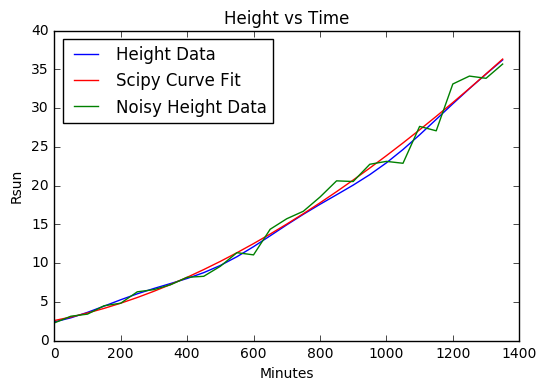

In [3]:
plt.title("Height vs Time")
plt.xlabel('Minutes')
plt.ylabel('Rsun')
plt.plot(time/60, h/Rsun_m, label="Height Data")
plt.plot(time/60, cme_graphing.sin_height(time, *popt)/Rsun_m, 'r-', label="Scipy Curve Fit")
plt.plot(time/60, noise_h/Rsun_m, label='Noisy Height Data')
plt.legend(loc=2)

For the model equation, a0=53000.000000 a1=30000.000000 a2=0.000000 a3=100000.000000 a4=4.600000 a5=1920132000.000000
Least-squares linear fit (noisy height) : a0=292933.366721 a1=-608521315.982207 
Least-squares quadratic fit (noisy height): a0=2.149156 a1=118851.729008 a2=1654539974.291624
Least-squares linear fit (noisy velocity): a=3.684497 m/s, v=137679.060808 km/s
Curve fit: a0=-88880.952048 a1=0.618338 a2=272178.149450 a3=144946.743599 a4=3.573827


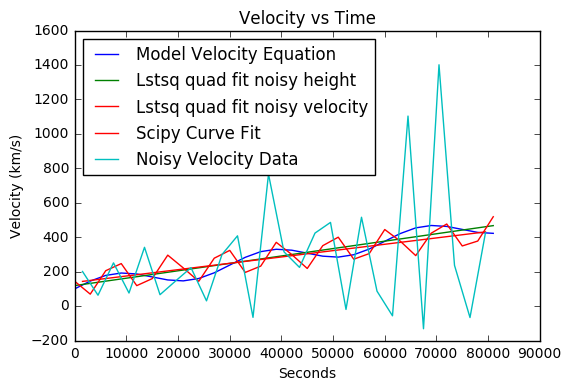

In [7]:
center_time=(cme_graphing.format_time(time))

#Velocity 1: Model equation
vx= cme_graphing.sin_velocity(time, a_0, a_1, a_2, a_3, a_4)
v_noise = np.random.normal(scale=0.05, size=len(vx))
v_data = vx + v_noise
print ("For the model equation, a0=%f a1=%f a2=%f a3=%f a4=%f a5=%f" % (a_0, a_1, a_2, a_3, a_4, a_5))

#Velocity 2: Linear Algebra Least-squares with noisy height
A = np.vstack([time, np.ones(len(time))]).T
lin = np.linalg.lstsq(A, noise_h)[0] #grabs values for velocity
print('Least-squares linear fit (noisy height) : a0=%f a1=%f ' % (lin[0], lin[1]))

A = np.vstack([time**2, time, np.ones(len(time))]).T
quad = np.linalg.lstsq(A, noise_h)[0] #grabs values for acceleration and velocity
fit_noisy_h = quad[1] + (time * quad[0]*2) #quad1=velocity, quad0=acceleration
print('Least-squares quadratic fit (noisy height): a0=%f a1=%f a2=%f' % (quad[0], quad[1], quad[2]))

#Velocity 3: Linear Algebra Least-squares with noisy velocity
noisy_v=cme_graphing.get_derivative(noise_h, time)
A = np.vstack([center_time, np.ones(len(center_time))]).T
lin = np.linalg.lstsq(A, noisy_v)[0]
fit_noisy_v = lin[1] + (center_time * lin[0])
print('Least-squares linear fit (noisy velocity): a=%f m/s, v=%f km/s' % (lin[0], lin[1]))

#Velocity 4: Plt curve fit function
popt, pcov = curve_fit(cme_graphing.sin_velocity, time[:-1]+(time[1:]-time[0:-1])*0.5, noisy_v)
print ("Curve fit: a0=%f a1=%f a2=%f a3=%f a4=%f" %(popt[0], popt[1], popt[2], popt[3], popt[4]))

#Plotting
plt.title("Velocity vs Time")
plt.xlabel('Seconds')
plt.ylabel('Velocity (km/s)')
plt.plot(time, vx/1000, label='Model Velocity Equation')
plt.plot(time, fit_noisy_h/1000, label='Lstsq quad fit noisy height')
plt.plot(center_time, fit_noisy_v/1000, label='Lstsq quad fit noisy velocity')
plt.plot(time, cme_graphing.sin_velocity(time, *popt)/1000, 'r-', label='Scipy Curve Fit')
plt.plot(center_time, noisy_v/1000, label='Noisy Velocity Data')
plt.legend(loc=2)


In [ ]:
#Plot Velocity vs Time
#diff_height_data=np.diff(h)
#diff_time_data=np.diff(time)
#velocity=diff_height_data/(diff_time_data.astype(float))
